<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization-Cell---run-this-first!" data-toc-modified-id="Initialization-Cell---run-this-first!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization Cell - run this first!</a></span></li><li><span><a href="#Convolution-in-1-D" data-toc-modified-id="Convolution-in-1-D-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convolution in 1-D</a></span><ul class="toc-item"><li><span><a href="#Application:-Signal-denoising--smoothing-via-a-convolution" data-toc-modified-id="Application:-Signal-denoising--smoothing-via-a-convolution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Application: Signal denoising  smoothing via a convolution</a></span></li></ul></li><li><span><a href="#Convolution-in-2-D" data-toc-modified-id="Convolution-in-2-D-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Convolution in 2-D</a></span><ul class="toc-item"><li><span><a href="#Application:--Image-manipulation-using-2-D-convolution" data-toc-modified-id="Application:--Image-manipulation-using-2-D-convolution-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Application:  Image manipulation using 2-D convolution</a></span></li></ul></li><li><span><a href="#Matrix-vector-viewpoint-of--2-D-convolution" data-toc-modified-id="Matrix-vector-viewpoint-of--2-D-convolution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Matrix-vector viewpoint of  2-D convolution</a></span></li><li><span><a href="#Application:-Image-Deblurring" data-toc-modified-id="Application:-Image-Deblurring-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Application: Image Deblurring</a></span><ul class="toc-item"><li><span><a href="#Setting-up-deblurring-as-a-least-squares-problem" data-toc-modified-id="Setting-up-deblurring-as-a-least-squares-problem-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Setting up deblurring as a least-squares problem</a></span></li><li><span><a href="#Challenge-problem" data-toc-modified-id="Challenge-problem-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Challenge problem</a></span></li><li><span><a href="#Deblurring-beyond-linear-kernels" data-toc-modified-id="Deblurring-beyond-linear-kernels-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Deblurring beyond linear kernels</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Initialization Cell - run this first!

In [1]:
using Pkg
##Pkg.add("DSP") ## uncomment if no DSP package
using Interact, Images, DSP, LinearAlgebra, SparseArrays
using Plots
gr(
    markerstrokewidth=0.3,
    markerstrokecolor=:white,
    label=""
)

imshow(A::Matrix; kwargs...) = heatmap(A; yflip=true, color=:grays, aspect_ratio=1.0,  showaxis=:false, kwargs...)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13556134095584507905\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11676953216222024293\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-13556134095584507905\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

imshow (generic function with 1 method)

# Convolution in 1-D

For two signals x[n] and h[n], the 1-D convolution of x[n] and h[n] is denoted $h*x$ and given by 

$$(h*x)[i] = \sum_{j = -\infty} ^ \infty x[j] h[i - j].$$

For example, if 

$$h[0] = 1 \textrm { and } h[1] = 2,$$

and if

$$x[0] = 3 \textrm{ and } x[1] = 3,$$

then we can compute their convolution using the command `conv` in the `DSP.jl` package as in the next cell. 

In [2]:
h = [1; 2]
x = [3; 3]
conv(x, h)

3-element Array{Int64,1}:
 3
 9
 6

In  `Julia` and `MATLAB`, unlike `Python`, the first element of the vector has index 1. So we modify our definition of convolution accordingly below.

Let $x \in \mathbb R^m$ and $h \in \mathbb R^n$. Let $y = h*x$ be the vector obtained by convolving $x$ and $h$. Mathematically, this is equivalent to 

\begin{equation}
y_i = \sum_{j} x_j h_{i-j+1},
\end{equation}

where the summation index j is over all indices for which $x_j$ and $h_{i-j+1}$ is defined, given the fact that $x$ is a length $m$ vector and $h$ is a length $n$ vector. 

This means that we can re-write the equation in the form

\begin{equation}
y_i = \sum_{j = 1}^{m} x_j h_{i-j+1}
\end{equation}

This gives us the 1-D convolution equation for 1-indexed vectors given by  

\begin{equation}
y_i = \sum_{j} x_j h_{i-j+1} \textrm{ for }  j = \max(1,i-n+1), \ldots, \min(i,m).
\end{equation}

**Exercise**:

Write function that takes as its input the vectors `h` and `x` and returns as its output their 1-D convolution.

In [3]:
function conv1d(h::Vector, x::Vector)
    m = length(x)
    n = length(h)
    y = zeros(n + m - 1)
    
    for i in 1:(m+n-1)
        j_low = max(1, i-n+1)
        j_high = min(i, m)
        
        for j in j_low:j_high
            y[i] += x[j] * h[i-j+1]
        end
    end
    return y 
end

conv1d (generic function with 1 method)

Now we test this function and see if it returns the same answer as the in-built convolution in Julia.

In [4]:
m, n  = 7, 5
h, x = randn(m), randn(n)
conv_error =  norm(conv(h, x) - conv1d(h, x))
println("Error between conv1d and conv output is $conv_error")

Error between conv1d and conv output is 6.1721061478217895e-16


## Application: Signal denoising  smoothing via a convolution 

Here we can see the effect of various kernels on a 1-D signal. We will consider both the original signal and a noisy version of the same signal

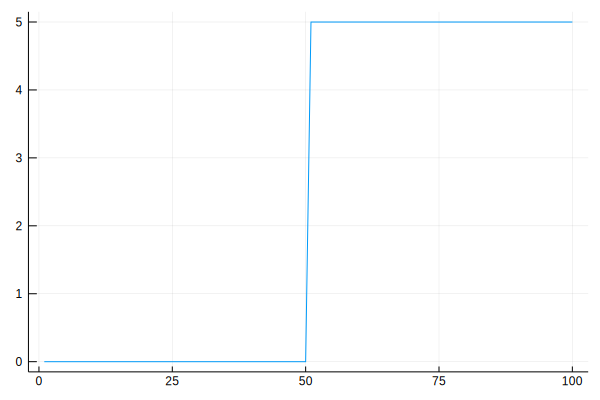

In [5]:
true_signal = [zeros(50); 5 * ones(50)]
plot(true_signal)

Now we add some noise to the signal

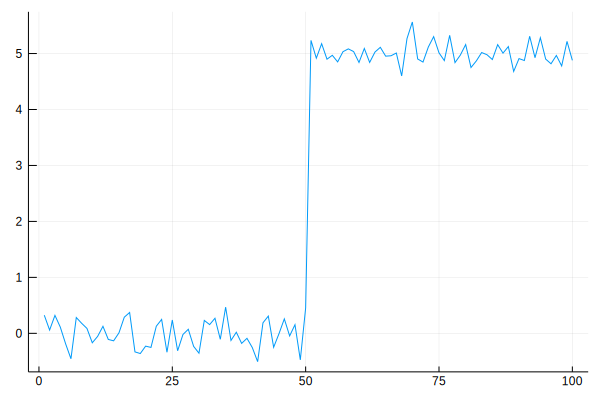

In [6]:
σ = 0.2
noisy_signal = true_signal + σ * randn(100)
plot(noisy_signal)

In [7]:
diff_kernel = [1; -1]

2-element Array{Int64,1}:
  1
 -1

In the below cell we can see the difference kernel in action

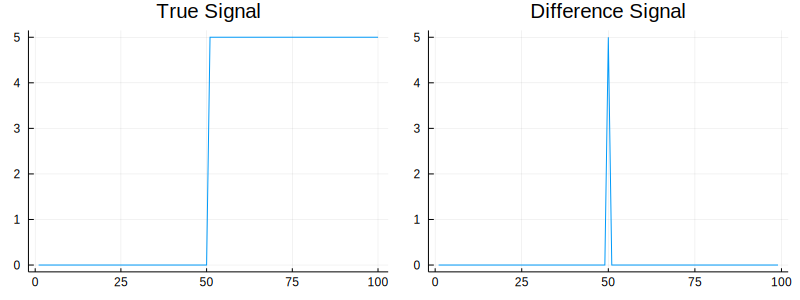

In [8]:
diff_true_signal = conv1d(diff_kernel, true_signal)[2:(end - 1)]
p1 = plot(true_signal; title="True Signal")
p2 = plot(diff_true_signal; title="Difference Signal")
plot(p1, p2; size=(800, 300))

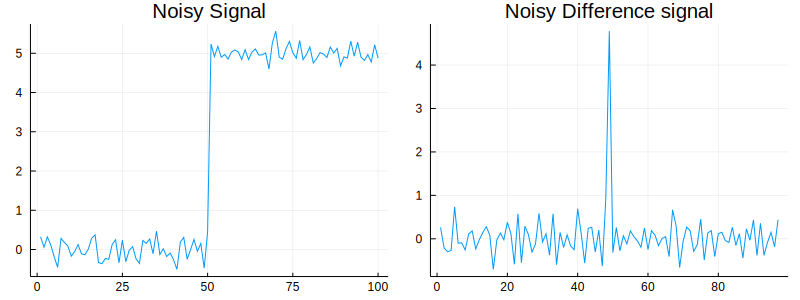

In [9]:
diff_noisy_signal = conv1d(diff_kernel, noisy_signal)[3:(end - 2)]
pn1 = plot(noisy_signal; title="Noisy Signal")
pn2 = plot(diff_noisy_signal; title="Noisy Difference signal")
plot(pn1, pn2; size=(800, 300))

# Convolution in 2-D

The same concept of 1-D convolution can be extended to 2-D as follows

<img src="conv_example.png" width=600px>

For two signals of two variables x[i,j] and h[i,j], the 2-D convolution of x[i,j] and h[i,j] is given by,

$$(h*x)[i,j] = \sum_{u} \sum_{v} x[u,v] h[i - u,j-v].$$

We assume that $x[i,j]$ and $h[i,j]$ are zero wherever the signal is not present

As in the 1-D setting, we need to ensure that our input matrices and our convolved matrix, all of them start with index (1,1) to make our math compatible with programming in `MATLAB` and `Julia`. 

Let $X \in \mathbb R^{m \times n}$ and $H \in \mathbb R^{k \times l}$. Let $Y = H*X$ be the matrix obtained after convolution. Then we have that

\begin{equation}
Y_{i,j} = \sum_{u} \sum_{v} X_{u,v} H_{i-u+1,j-v+1},
\end{equation}

where the summation index $j$ is over all indices for which $H_{u,v}$ and $H_{i-u+1,j-v+1}$ are defined.

Repeating the same argument as before in the 1-D case we can show that we need

$$\max(1,i-k+1) \leq u \leq \min(m,i)$$

and

$$\max(1,j-l+1) \leq v \leq \min(n,j),$$

and that the size of the output is $(k + m - 1) \times (n + l -1)$.

**Exercise**:

Write a function that takes as its input the matrices `H` and `X` and returns as its output their 2-D convolution.

In [10]:
function conv2d(H::Matrix, X::Matrix)
    m, n = size(X)
    k, l = size(H)
    Y = zeros(k+m-1, n+l-1)
    
    for i in 1:(k+m-1)
        for j in 1:(n+l-1)
            u_low = max(1, i-k+1)
            u_high = min(m, i)
            
            v_low = max(1, j-l+1)
            v_high = min(n, j)

            for u in u_low:(u_high)
                for v in v_low:(v_high)
                    Y[i, j] += X[u, v] * H[i-u+1, j-v+1]
                end
            end
        end
    end
    return Y
end

conv2d (generic function with 1 method)

Now let us check if this is same as the answer (upto numerical precision) given by the inbuilt Julia function

In [11]:
m, n = 4, 6
k, l = 10, 6 
H = randn(m, n)
X = randn(k, l)
conv_error =  norm(conv(H, X) - conv2d(H, X)) #Testing with default JULIA function
println("Error between conv2d and conv2 output is $conv_error")

Error between conv2d and conv2 output is 1.374093116045306e-14


## Application:  Image manipulation using 2-D convolution 

Now let us see some common kernels in 2-D and see how they affect an image.

Let us input out test image

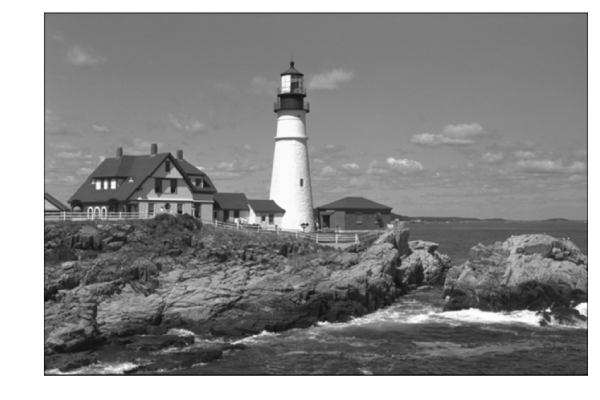

In [12]:
img = load("lighthouse.png")
img = Gray.(img)
img1_mat = img |> Array
p1 = imshow(img1_mat)


Here are the list of kernels we are going to convolve our image with:

-- Gaussian Blur

-- Sharpening filter Kernel

-- Edge Detection filter

-- Embossing filter
   
You can read more about these kernels <a href="https://en.wikipedia.org/wiki/Kernel_(image_processing)">here</a>.

In [13]:
W_gauss_blur = [1; 1; 3; 1; 1] * [1 1 3 1 1]
W_sharpen = [0 -1 0; -1 5 -1; 0 -1 0]
W_edge_det = [0 1 0;1 -4 1;0 1 0]
W_emboss = [-2 -1 0; -1 1 1; 0 1 2]
kernel_set = [W_edge_det, W_emboss, W_gauss_blur, W_sharpen];
kernel_name = ["Edge Detection","Emboss", "Gaussian Blur","Sharpen"];
kernel_dictionary = Dict(kernel_name[i] => i for i in 1:length(kernel_name))

Dict{String,Int64} with 4 entries:
  "Sharpen"        => 4
  "Gaussian Blur"  => 3
  "Edge Detection" => 1
  "Emboss"         => 2

We will now use these kernels to manipulate the image and visualize the resulting manipulated image. 

In [14]:
@manipulate for kernel in kernel_name
    W = kernel_set[kernel_dictionary[kernel]]
    W = Array(W)
    img_conv = conv2d(img1_mat, W)
    img_conv_norm = img_conv / maximum(img_conv)
    disp_img = [img1_mat / maximum(img1_mat) ones(size(img1_mat, 1), 100) img_conv_norm[1:size(img1_mat, 1), 1:size(img1_mat, 2)]]
    imshow(
        disp_img;
        size=(800, 300),
        clim=(-1, 1),
        title="original image (left) versus convolved image (right)"
    )
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["kernel"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :span), Any[Node{DOM}(DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text : key")))], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes=>("data-bind"=>"foreach : options_js"),:className=>"buttons has-addons is-centered"))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key"=>"Edge Detection","val"=>1,"id"=>"id1CSQ4sma"), OrderedDict{String,Any}("key"=>"Emboss","val"=>2,"id"=>"iddx7RW2d7"), OrderedDict{String,Any}("key"=>"Gaussian Blur","val"=>3,"id"=>"idj3cUxuIU"), OrderedDict{String,Any}("key"=>"Sharpen","val"=>4,"id"=>"idHIriZUpp")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/nbuser/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007fb051df6e60])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"3932742754394691544\",\"id\":\"ob_05\",\"type\":\"observable\"}),\"index\":WebI

It is remarkable that changing the numbers in such a small kernel matrix can produce output images that are so visually different. This is an important component of the various filters in photo apps such as Instagram. See [here](https://helpx.adobe.com/photoshop/using/filter-effects-reference.html) for more information.

# Matrix-vector viewpoint of  2-D convolution

It turns out we can express 2-D convolution as a matrix-vector product as well. 

Suppose $X \in \mathbb{R}^{m \times n}$ and $H \in \mathbb{R}^{h_x, h_y}$. 

Then the matrix $H_{u,v}$ is of size $(m+h_x-1) \cdot (n+h_y-1) \times m\,n$ and we have that 

$$Y[:] = H_{u,v} X[:],$$ 

Thus $H_{u,v} \times X[:]$ produces an $(m + h_x - 1) \cdot (n+h_y-1)$ convolved vector, which we reshape into a $(m + h_x -1) \times (n + h_y -1)$ array to produced the convolved $Y = H * X$. This notation brings into sharp focus the fact the the convolved image is *slightly larger* than the original image so we need to account for this when we display the images.

The function `matrix_2dconv` below takes as its input the convolution kernel matrix $H$ and the signal matrix $X$ and returns as its output the matrix $H_{u,v}$ and the convolved array $C$.

In [15]:
function convolution(h, x) ## this is the matrix you defined in your last HW
    m, n = length(h), length(x)
    H = [(1 <= j - k + 1 <= m) ? h[j - k + 1] : 0.0 for j in 1:(m + n - 1), k in 1:n]
    return H
end

function matrix_2dconv(H::Matrix, X::Matrix)
    
    hx, hy = size(H)
    m, n = size(X)
    
    k = m + hx -1
    l = n + hy -1

    Huv = spzeros(k * l, m * n)

    for i in 1:hy
        v = zeros(hy)
        v[i] = 1
        u = H[:, i]
        Hv = convolution(v, ones(n)) #Note that here we want a conv matrix so we can convolve with any vector of the same length as row of x
        Hu = convolution(u, ones(m)) #Note that here we want a conv matrix so we can convolve with any vector of the same length as col of y
        Huv += kron(spdiagm(0 => ones(l)), Hu) * kron(Hv, spdiagm(0 => ones(m)))
    end
    
    c = Huv * X[:]
    C = reshape(c, k, l)
    
    return Huv, C
end

matrix_2dconv (generic function with 1 method)

**(Optional advanced) Exercise**: 

Mathemtically express the 2D convolution matrix in terms of the 1D convolution convolution.

Now let us test this with the default conv function in Julia and check

In [16]:
C = matrix_2dconv(H, X)[2]
C_julia = conv(H, X)
conv2_error =  norm(C - C_julia)
println("Error between convolution via matrix-vector versus conv2 equals $conv2_error ")

Error between convolution via matrix-vector versus conv2 equals 1.3049653129914306e-14 


Both give the same answer (as we should expect), within some numerical precision. In practice `conv2` is used for a reason that we will bring into sharp focus next.  To that end, we compare the time it takes to compute the 2d convolution using the matrix-vector formulation versus the in-built `conv2` function.
    
We first benchmark the matrix-vector implementation.

In [17]:
using BenchmarkTools
X = randn(500, 600)
H = randn(4, 3)

@benchmark _, C = matrix_2dconv(H, X)

BenchmarkTools.Trial: 
  memory estimate:  349.30 MiB
  allocs estimate:  282
  --------------
  minimum time:     593.495 ms (77.86% GC)
  median time:      628.426 ms (78.87% GC)
  mean time:        665.541 ms (80.29% GC)
  maximum time:     823.209 ms (84.45% GC)
  --------------
  samples:          8
  evals/sample:     1

We then benchmark the `conv` function. 

In [18]:
@benchmark C_julia = conv(H, X)

BenchmarkTools.Trial: 
  memory estimate:  26.38 MiB
  allocs estimate:  162
  --------------
  minimum time:     26.775 ms (12.71% GC)
  median time:      30.888 ms (12.35% GC)
  mean time:        31.167 ms (14.30% GC)
  maximum time:     37.772 ms (21.63% GC)
  --------------
  samples:          161
  evals/sample:     1

2-D convolution in `conv2` is performd using the Fast Fourier Transform (FFT) algorithm and not via matrix-vector algorithms. GPUs are particularly fast at accomplishing these -- see [here](https://developer.nvidia.com/discover/convolution) for more on this.  

# Application: Image Deblurring

In what follows, we assume that the deblurring kernel is known and we will use this explicitly to estimate the unblurred (or original) image. 

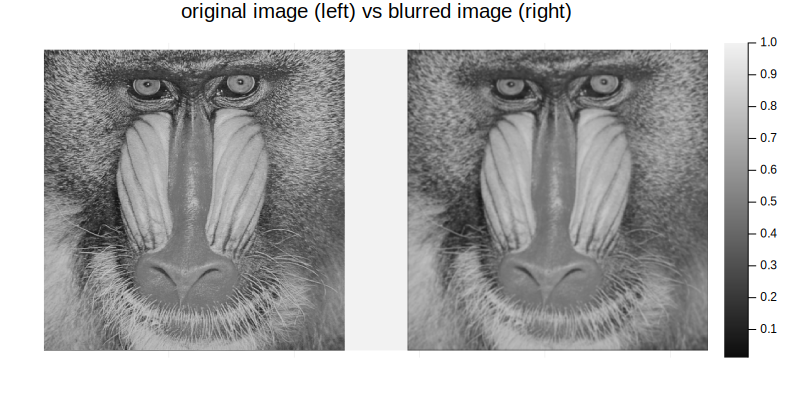

In [19]:
W_gauss_blur5 = 1 / 256 * [1; 4; 6; 4; 1] * [1 4 6 4 1]

img = load("mandrill.png")
img = Gray.(img)
m, n = size(img)
img1_mat = Array(img)
img_gb5 = conv2d(img1_mat, W_gauss_blur5)
imshow(
    [img ones(m, 100) img_gb5[3:(end - 2), 3:(end - 2)]];
    title="original image (left) vs blurred image (right)",
    size=(800, 400)  
  )

**Exericse**:

Remark on the features where the blurring is most apparent.

the whiskers and the ridges on the nose. And the eyes seems to be blurred too. 

## Setting up deblurring as a least-squares problem

According to the theory in the previous section we saw that 2-D convolution can be respresented as a matrix vector product.

Let $X$ be the original image and $Y$ be the Gaussian blurred image, then we have that

$$Y[:]  = H_2 X[:]$$

The **deblurring problem** consists of estimate $X$ from $Y$ given the known of $H$. We do this by posing as the least squares optimization problem

$$\hat{x}_{\sf deblur} = \arg \min_x ||Hx - y||_2^2$$

We can then reshape $\hat{x}$ to display it as an image. 

In [20]:
H, _ = matrix_2dconv(W_gauss_blur5, img1_mat)
@show size(H)

size(H) = (234256, 230400)


(234256, 230400)

Since H is too big (check it's size!) we have to use an iterative algorithm to solve it. To that end we will use Nesterov's accelerated gradient descent code from an earlier codex.

In [21]:
using SparseArrays, LinearAlgebra
function lsngd(A::Union{Matrix, SparseMatrixCSC}, b::AbstractVector, mu::Number, x0::AbstractVector, nIters::Integer)
    loss = zeros(nIters)
    # Nesterov-accelerated gradient descent
    t = 0
    xLast = x0
    x = x0
    for idx in 1:nIters
        # t update
        tLast = t
        t = 0.5 * (1 + sqrt(1 + 4 * t^2))

        # z update (momentum)
        z = x + ((tLast - 1) / t) * (x - xLast)

        # x update
        xLast = x
        x = z - mu * (A' * (A * z - b))
        loss[idx] = norm(A * x - b)
    end
    return x, loss
end

lsngd (generic function with 1 method)

We need a suitable value for $x_0$ which is our initial guess. We can start with any vector but a logical starting point would be to start with the blurred image (of course we need to truncate the blurred image since convolution with a 2-D kernel increases the size of the image)

**Exercise**: Set the value of `mu` and `nIters` below till you get a small enough deblurring error.

Note: The `mu` is the learning rate -- if it is set too large then the loss will diverge. Theoretically we know that it should be set smaller than $1/\sigma_1(A)^2$ where $\sigma_1(A)$ is the largest singular value of the $A$ matrix in the $Ax \approx b$ formulation. 

In [22]:
y = img_gb5[:]
x0 = img_gb5[3:end-2,3:end-2][:]
mu = 10-9
nIters = 500

500

In [23]:
xh, deblurring_loss = lsngd(H, y, mu, x0, nIters)
Xh = reshape(xh, m, n)
deblur_error = norm(img1_mat - Xh)
println("Deblurring error equals $deblur_error")

Deblurring error equals 10.624285985316115


We now compare the reconstruction with the original and blurred image.

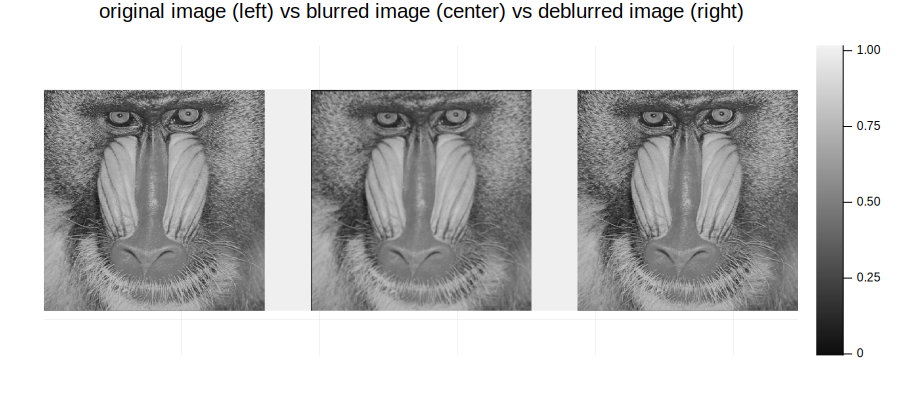

In [24]:
imshow(
    [img ones(m,100) img_gb5[1:m, 1:n] ones(m, 100) Xh];
    title="original image (left) vs blurred image (center) vs deblurred image (right)",
    size=(900, 400)
)

We visualize the deblurring loss.

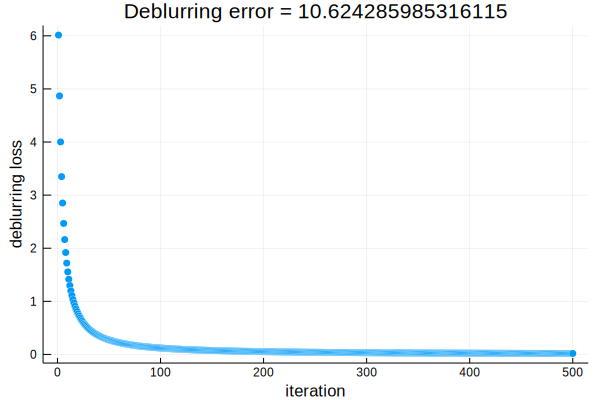

In [25]:
scatter(deblurring_loss, xlabel = "iteration", ylabel = "deblurring loss", title = "Deblurring error = $deblur_error")

In this case, we can compare the original and deblurred images to gain insights on the algorithm. In practice, we cannot do so because if we knew the original image against which we would measure the deblurring error, then we would not need to deblur in the first place!

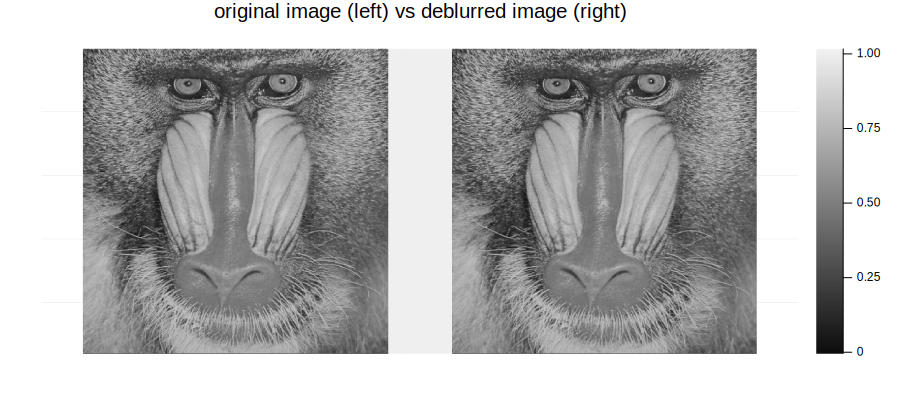

In [26]:
imshow(
    [img ones(m,100) Xh];
    title="original image (left) vs deblurred image (right)",
    size=(900, 400)
)

**Exeercise**:

Comment on the quality of the deblurred image relative to the blurred image . 

It is really hard to tell the difference between them.

A **famous success** story of image deblurring in the real-world is  from the [Hubble Space Telescope](http://hubblesite.org/). Scientists realized that the mirrors on the **very expensive** telescope were [not quite right](https://www.nasa.gov/content/hubbles-mirror-flaw) and so the images being sent back to earth were [blurrier than expected](https://www.newscientist.com/article/mg12717301-000-the-testing-error-that-led-to-hubble-mirror-fiasco/). They determined the blur kernel and de-convolved the images, and could then [see the universe in sparkling detail like never before](https://spaceflightnow.com/2015/04/23/fixing-hubbles-blurry-vision/). An example of such a before/after image is below.


![hubble](hubble.jpg)

For more info on the technical aspects on this see [here](https://svs.gsfc.nasa.gov/2796). This is a setting where we do not know the original image before we beging deblurring except to know that we can do better knowing that the instrumentation produces a blur in the first place. 

## Challenge problem

You are given a passcode which is blurred by a blurring kernel. Your task is to extract the passcode from the blurred image given the kernel used to blur it and the blurred image

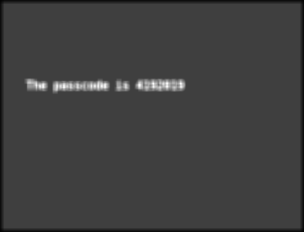

In [27]:
blur_img = load("blurred_pass.png")

The blurred image is above. We then convert the image to an Array so that we can process it

In [28]:
blur_mat = Array(blur_img); #Convert to float array

The Kernel that was used to blur our passcode is a 5x5 box blur kernel. A box blur takes the average of all the elements in a 5x5 square. It is defined below as follows

In [29]:
W = 1 / 25 * ones(5) * ones(5)'

5×5 Array{Float64,2}:
 0.04  0.04  0.04  0.04  0.04
 0.04  0.04  0.04  0.04  0.04
 0.04  0.04  0.04  0.04  0.04
 0.04  0.04  0.04  0.04  0.04
 0.04  0.04  0.04  0.04  0.04

**Exercise**:

Complete the code below for deblurring the image and enter the passcode when you are done.

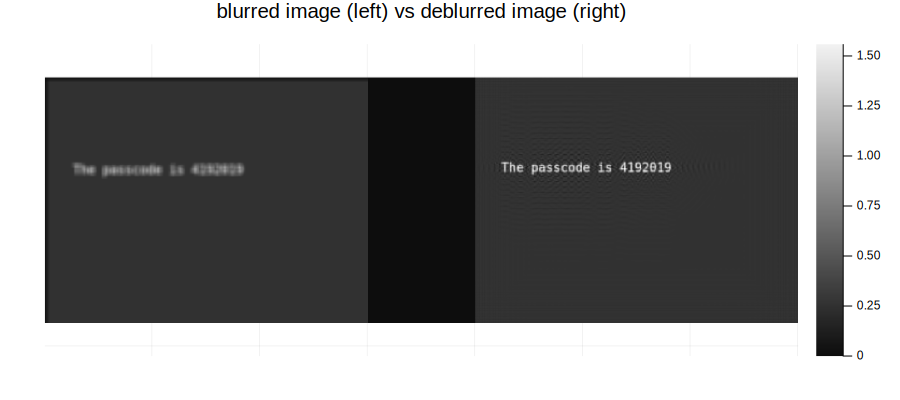

In [30]:
y = blur_mat[:]
x0 = blur_mat[3:(end - 2), 3:(end - 2)][:]
m, n = size(blur_mat[3:(end - 2), 3:(end - 2)])

ip = blur_mat[3:(end - 2), 3:(end - 2)] ## proxy for input image 
## TODO: Why are we passing an input to the function below? Hint: How does the function determine size of H matrix?
H, _ = matrix_2dconv(W, ip) 
mu = 0.03 
nIters = 500
xh, deblurring_loss = lsngd(H, y, mu, x0, nIters)

Xh = reshape(xh, m, n)
imshow(
    [blur_mat[1:m, 1:n] zeros(m, 100) Xh];
    title="blurred image (left) vs deblurred image (right)",
    size = (900,400)
)

**Exercise**:

Enter the passcode below.

In [31]:
function deblurred_passcode()
    passcode  = 4192019
    return passcode
end

deblurred_passcode (generic function with 1 method)

<img src ="yay.jpg" width = "400">

This is the power of convolution!

## Deblurring beyond linear kernels

Pictures taken by camera are often blurred due to motion of the camera. The blur kernels associated with such blurring goes beyond what linear kernels can represent. Simply put, each pixel has its own blur kernel. For more on this, see [here](http://www.jhlabs.com/ip/blurring.html).

# Summary

Convolution is a powerful technique and is the backbone of convolutional neural networks (CNNs) which are widely used and achieve state-of-the-art performance for image classication and many computer vision tasks. 